In [1]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("AirQualityUCI.csv", delimiter= ";")

In [3]:
df.describe

<bound method NDFrame.describe of             Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1     10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2     10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3     10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4     10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   

In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [6]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'])

df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.')
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'])

df['T'] = df['T'].str.replace(',', '.')
df['T'] = pd.to_numeric(df['T'])

df['RH'] = df['RH'].str.replace(',', '.')
df['RH'] = pd.to_numeric(df['RH'])

df['AH'] = df['AH'].str.replace(',', '.')
df['AH'] = pd.to_numeric(df['AH'])


AttributeError: Can only use .str accessor with string values!

In [ ]:
# Combine Date time
df["Time"] = df["Time"].str.replace(".", ":", regex=False)
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True)
df = df.set_index("Datetime").sort_index()
df.drop(columns=["Date", "Time"], inplace=True)


In [ ]:
df.info()

In [8]:
df_clean = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])

In [9]:
df_sensors = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'CO(GT)', 'NMHC(GT)'])
df_gt = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])

<Axes: >

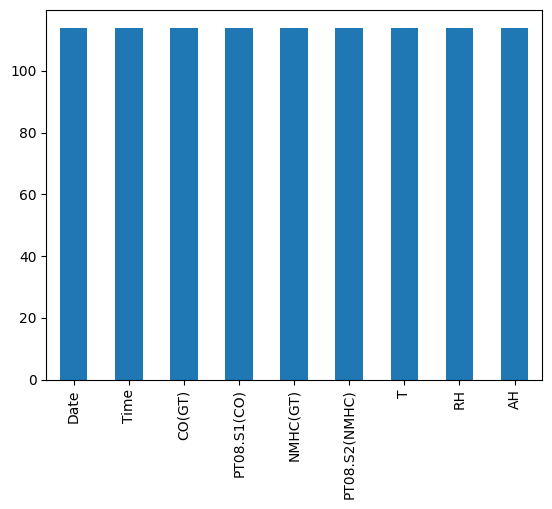

In [10]:
df_clean.isna().sum().plot.bar()

In [ ]:
df_clean = df_clean.dropna()

In [ ]:
df_clean.isna().sum().plot.bar()

In [ ]:
df_clean.to_csv('AirQualityUCI_clean.csv')
df_gt.to_csv('GT.csv')
df_sensors.to_csv('sensors.csv')

In [12]:
df2 = df_clean

In [ ]:
# More data cleaning, change all object to float


In [ ]:
vars_to_plot = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NMHC(GT)",
    "PT08.S2(NMHC)"
]

df2[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [13]:
interpolated = df2.copy()
interpolated.iloc[523:528]


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH
523,01/04/2004,13.00.00,1.7,1125.0,179.0,924.0,21.8,33.9,0.8771
524,01/04/2004,14.00.00,1.7,-200.0,222.0,-200.0,-200.0,-200.0,-200.0000
525,01/04/2004,15.00.00,1.9,-200.0,197.0,-200.0,-200.0,-200.0,-200.0000
526,01/04/2004,16.00.00,2.3,-200.0,319.0,-200.0,-200.0,-200.0,-200.0000
527,01/04/2004,17.00.00,3.3,1308.0,388.0,1193.0,23.6,27.5,0.7913


In [14]:
numeric_cols = interpolated.select_dtypes(include=[np.number]).columns

interpolated[numeric_cols] = (
    interpolated[numeric_cols]
    .replace(-200.0, np.nan)
    .interpolate()
)
interpolated.iloc[523:528]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH
523,01/04/2004,13.00.00,1.7,1125.00,179.0,924.00,21.80,33.9,0.87710
524,01/04/2004,14.00.00,1.7,1170.75,222.0,991.25,22.25,32.3,0.85565
525,01/04/2004,15.00.00,1.9,1216.50,197.0,1058.50,22.70,30.7,0.83420
526,01/04/2004,16.00.00,2.3,1262.25,319.0,1125.75,23.15,29.1,0.81275
527,01/04/2004,17.00.00,3.3,1308.00,388.0,1193.00,23.60,27.5,0.79130


In [17]:
normalized = interpolated.copy()
for column in numeric_cols:
	minimum = interpolated[column].min()
	maximum = interpolated[column].max()
	normalized[column] = (interpolated[column] - minimum) / (maximum - minimum)
normalized.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH
0,10/03/2004,18.00.00,0.211864,0.511845,0.120981,0.362097,0.333333,0.499371,0.280066
1,10/03/2004,19.00.00,0.161017,0.463029,0.088832,0.312398,0.326882,0.484277,0.264282
2,10/03/2004,20.00.00,0.177966,0.541996,0.068528,0.303659,0.296774,0.563522,0.276352
3,10/03/2004,21.00.00,0.177966,0.523331,0.061760,0.308575,0.277419,0.638994,0.294190
4,10/03/2004,22.00.00,0.127119,0.448672,0.037225,0.247406,0.281720,0.633962,0.295216


In [ ]:
df_sensors.describe()

In [ ]:
# # convert all values -200 to nan, if it were to be 0 it can affect the average
# df2['CO(GT)'] = df2['CO(GT)'].replace(-200, np.nan)

# # fill all na with mean
# df2['CO(GT)'].fillna(df2['CO(GT)'].mean(), inplace=True)

# df2['PT08.S1(CO)'] = df2['PT08.S1(CO)'].replace(-200, np.nan)

# # fill all na with mean
# df2['PT08.S1(CO)'].fillna(df2['PT08.S1(CO)'].mean(), inplace=True)

# df2['PT08.S2(NMHC)'] = df2['PT08.S2(NMHC)'].replace(-200, np.nan)

# # fill all na with mean
# df2['PT08.S2(NMHC)'].fillna(df2['PT08.S2(NMHC)'].mean(), inplace=True)

#     #"NMHC(GT)"
 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

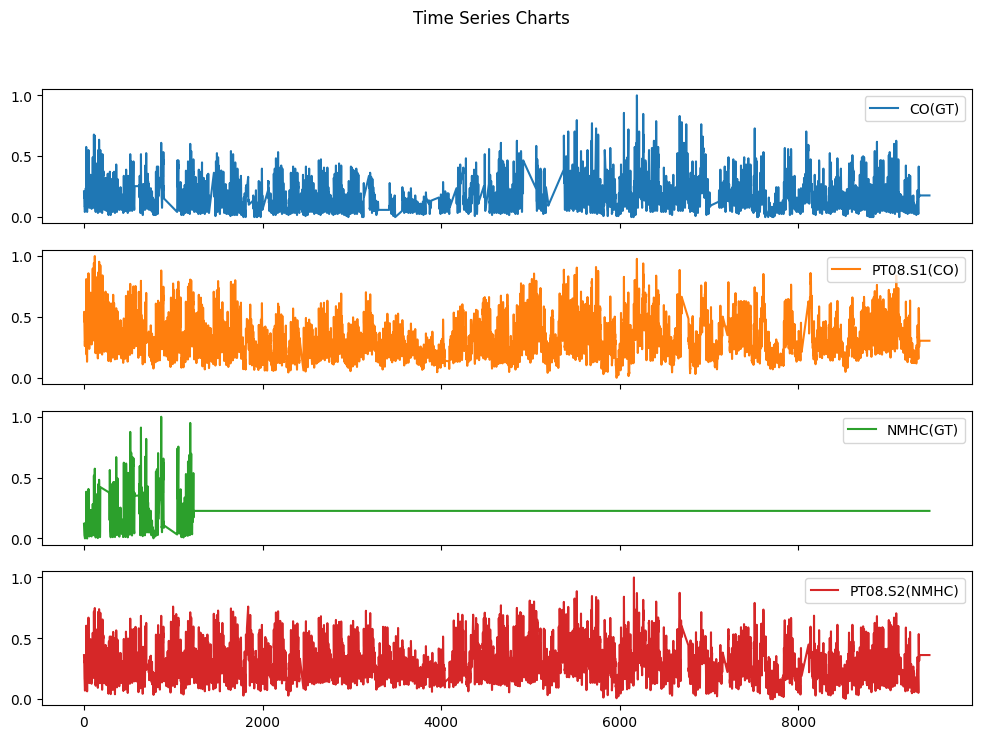

In [18]:
vars_to_plot = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NMHC(GT)",
    "PT08.S2(NMHC)"
]

normalized[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [ ]:
# Because of the missing data for NMHC (GT), synthetic data must be made to make up for the data loss.
# Therefore sensor data was used to discover patterns to create the synthetic data

In [ ]:
df_sensors = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'CO(GT)', 'NMHC(GT)'])
df_gt = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])

In [ ]:
vars_to_plot = [
    "CO(GT)",
    "C6H6(GT)",
    "NMHC(GT)",
    "NO2(GT)",
    "NOx(GT)"
]

df_gt[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [ ]:
df_gt.replace(-200, np.nan, inplace=True)
vars_to_plot = [
    "CO(GT)",
    "C6H6(GT)",
    "NMHC(GT)",
    "NO2(GT)",
    "NOx(GT)"
]

df_gt[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [ ]:
# Data for NMHC(GT) is incomeplete and can't be analyzed accurately 

# The GT of the other features looks like they are almost identical. 
# We can safely assume that NMHC's GT is similar to the other 4.
# Before proceeding lets look at the sensor data

vars_to_plot = [
    'PT08.S1(CO)',
    'PT08.S2(NMHC)',
    'PT08.S3(NOx)',
    'PT08.S4(NO2)',
    'PT08.S5(O3)'
]

df_sensors[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [ ]:
df_gt.head()